<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-05-17 14:19:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  46.1MB/s    in 3.3s    

2025-05-17 14:19:07 (46.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



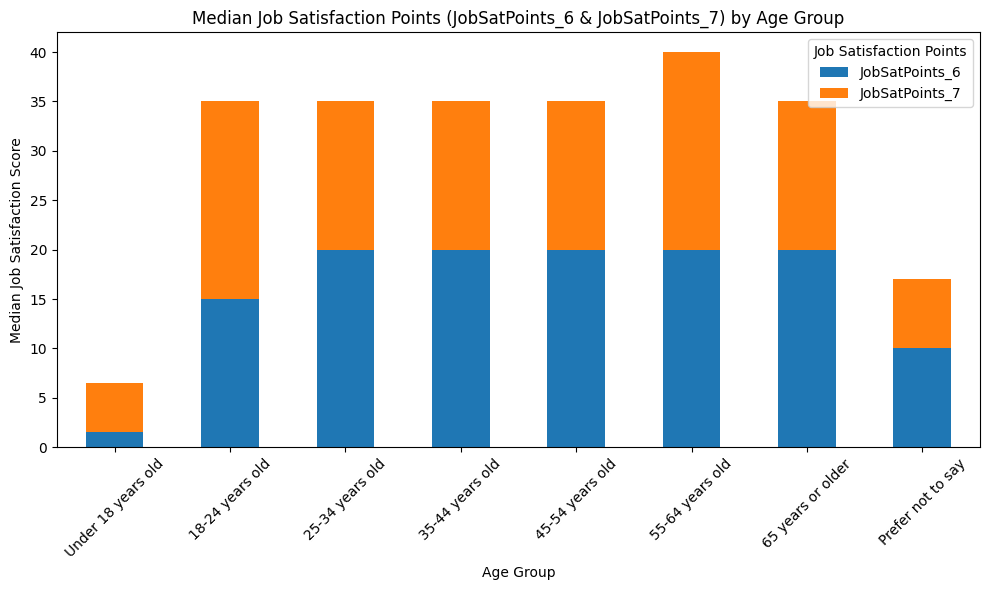

In [7]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('survey-data.csv')

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by Age and calculate median for JobSatPoints_6 and JobSatPoints_7
median_satisfaction = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort Age groups logically if needed (assuming Age groups like '18-24 years old', etc.)
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
             '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say']

median_satisfaction = median_satisfaction.reindex(age_order).dropna()

# Plot stacked bar chart
median_satisfaction.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Median Job Satisfaction Points (JobSatPoints_6 & JobSatPoints_7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction Points')
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_2056/3837645358.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


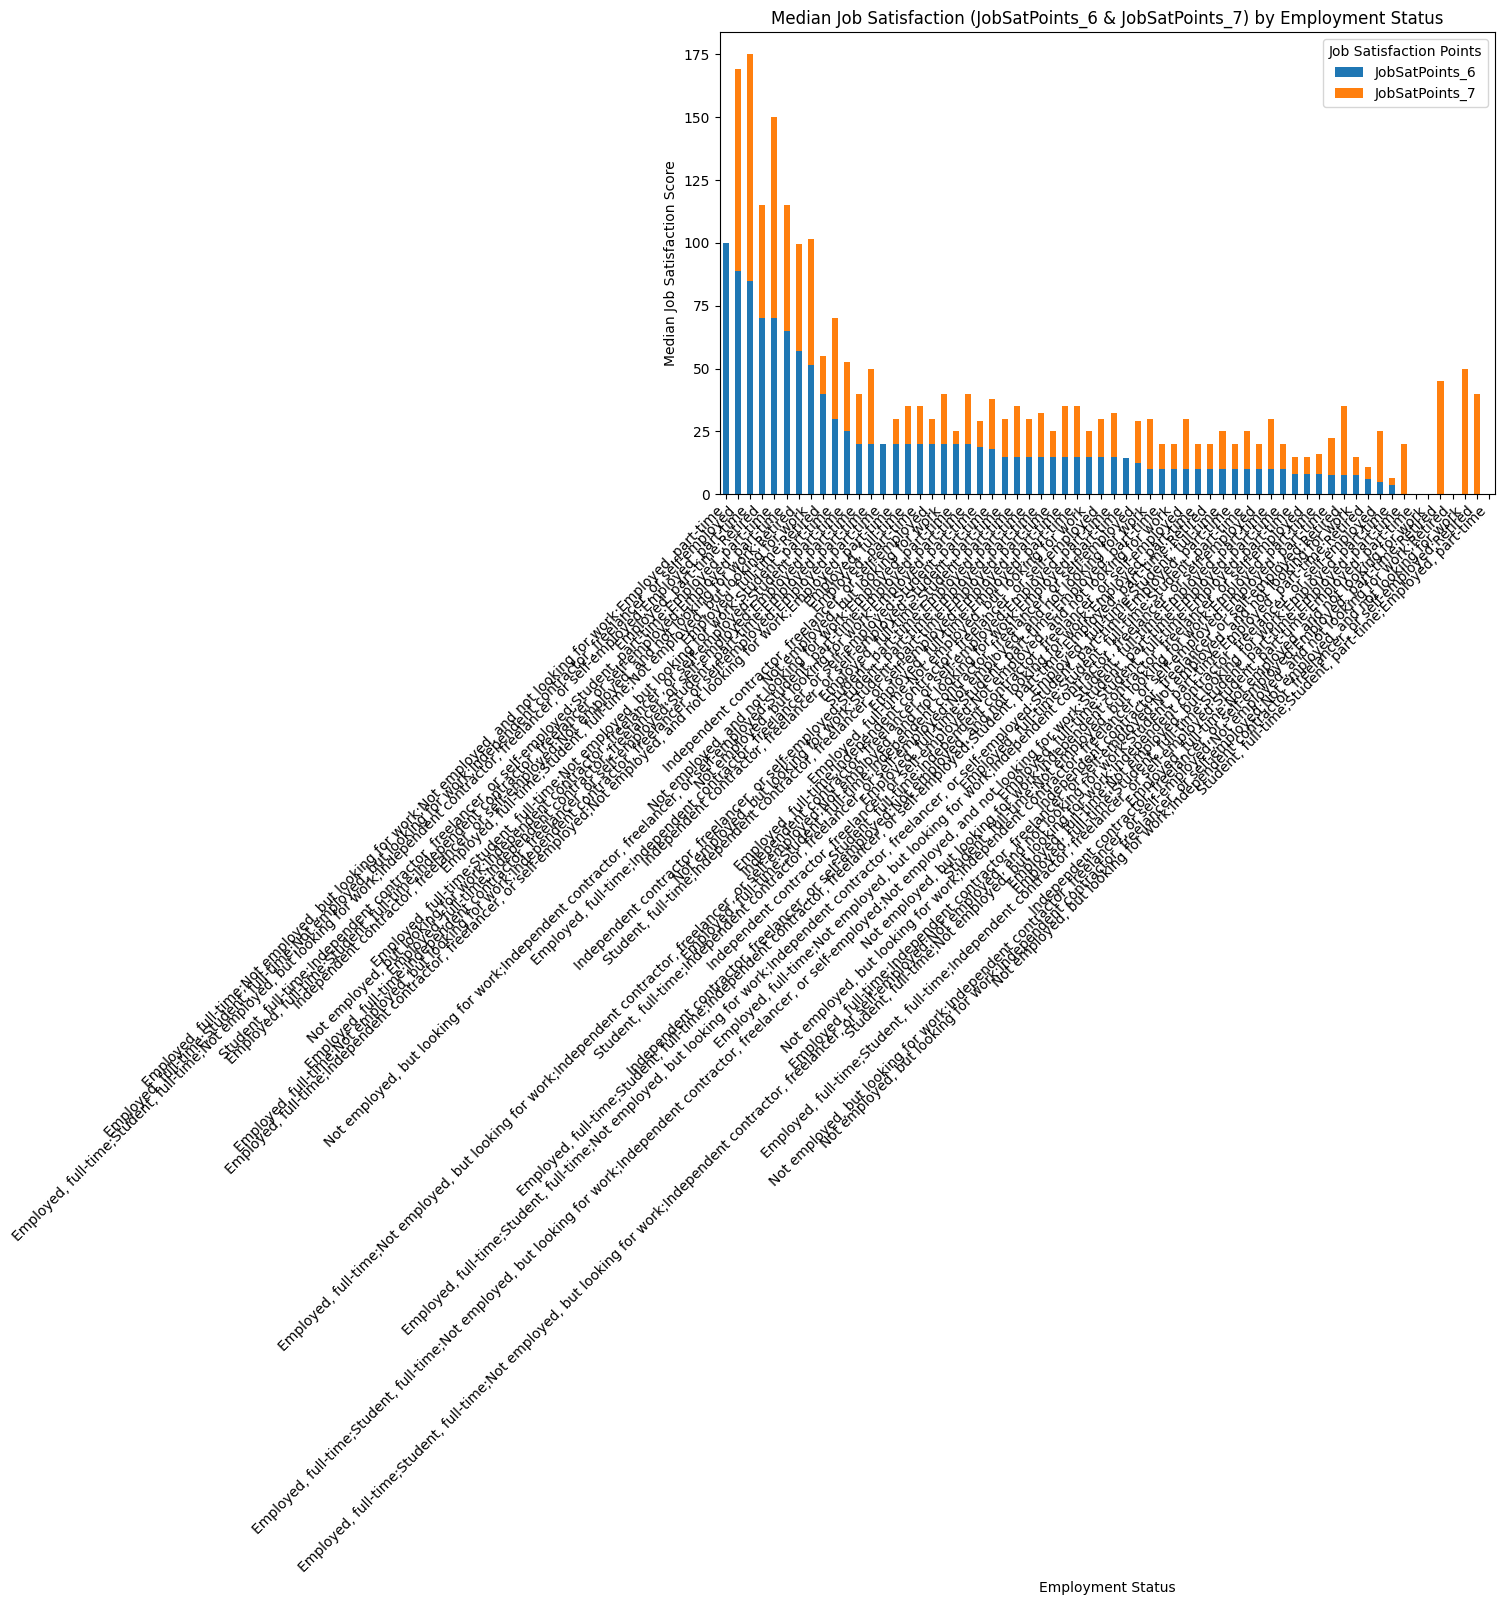

In [8]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('survey-data.csv')

# Clean data by dropping rows with missing values in relevant columns
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by Employment and calculate median job satisfaction points
median_satisfaction = df_clean.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort by median JobSatPoints_6 for better visualization
median_satisfaction = median_satisfaction.sort_values(by='JobSatPoints_6', ascending=False)

# Plot stacked bar chart
median_satisfaction.plot(kind='bar', stacked=True, figsize=(10,6), color=['#1f77b4', '#ff7f0e'])

plt.title('Median Job Satisfaction (JobSatPoints_6 & JobSatPoints_7) by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction Points')
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


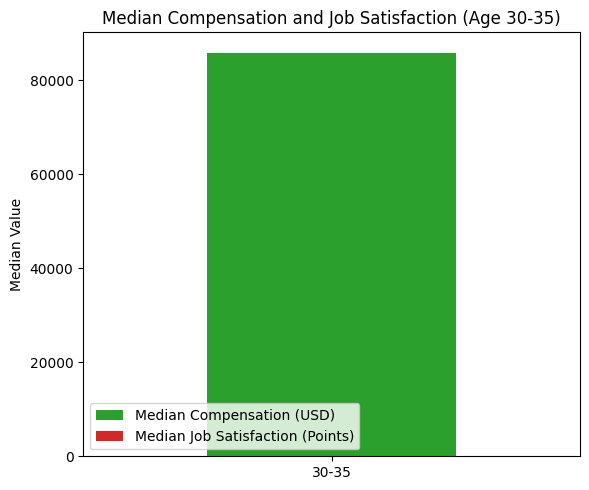

In [9]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('survey-data.csv')

# Filter for age group 30-35
# Assuming Age column contains age ranges like '30-34 years old' or '35-44 years old'
# You might need to check exact format and adjust filtering accordingly

age_group = ['30-34 years old', '35-44 years old']  # Approximate range including 30-35
df_age = df[df['Age'].isin(age_group)]

# Drop missing values in relevant columns
df_age_clean = df_age.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Calculate median compensation and job satisfaction for the group
median_values = {
    'ConvertedCompYearly': df_age_clean['ConvertedCompYearly'].median(),
    'JobSatPoints_6': df_age_clean['JobSatPoints_6'].median()
}

# Prepare DataFrame for plotting
plot_df = pd.DataFrame(median_values, index=['30-35'])

# Plot stacked bar chart
plot_df.plot(kind='bar', stacked=True, figsize=(6,5), color=['#2ca02c', '#d62728'])

plt.title('Median Compensation and Job Satisfaction (Age 30-35)')
plt.ylabel('Median Value')
plt.xticks(rotation=0)
plt.legend(['Median Compensation (USD)', 'Median Job Satisfaction (Points)'])
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


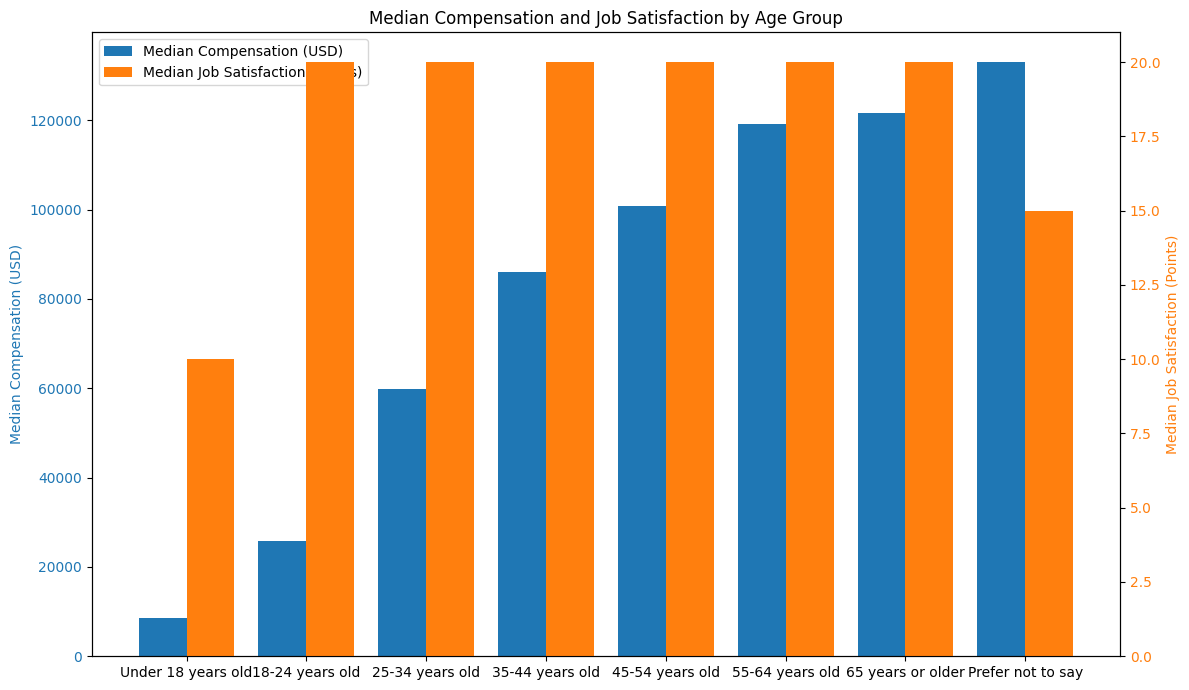

In [11]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('survey-data.csv')

# Select relevant columns and drop rows with missing values
df_clean = df[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Calculate median compensation and job satisfaction by Age group
median_stats = df_clean.groupby('Age').median()[['ConvertedCompYearly', 'JobSatPoints_6']]

# Define logical order for Age groups
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Reindex for ordering
median_stats = median_stats.reindex(age_order)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 7))  # Wider figure for better x-label spacing

bar_width = 0.4
indices = np.arange(len(median_stats))

# Bars for Median Compensation
bars1 = ax1.bar(indices - bar_width/2, median_stats['ConvertedCompYearly'], bar_width, label='Median Compensation (USD)', color='#1f77b4')
ax1.set_ylabel('Median Compensation (USD)', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Secondary axis for Median Job Satisfaction
ax2 = ax1.twinx()
bars2 = ax2.bar(indices + bar_width/2, median_stats['JobSatPoints_6'], bar_width, label='Median Job Satisfaction (Points)', color='#ff7f0e')
ax2.set_ylabel('Median Job Satisfaction (Points)', color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# X-axis labels
plt.xticks(indices, median_stats.index, rotation=45, ha='right')  # Rotate and align right

# Title
plt.title('Median Compensation and Job Satisfaction by Age Group')

# Create legend manually
ax1.legend([bars1, bars2], ['Median Compensation (USD)', 'Median Job Satisfaction (Points)'], loc='upper left')

plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


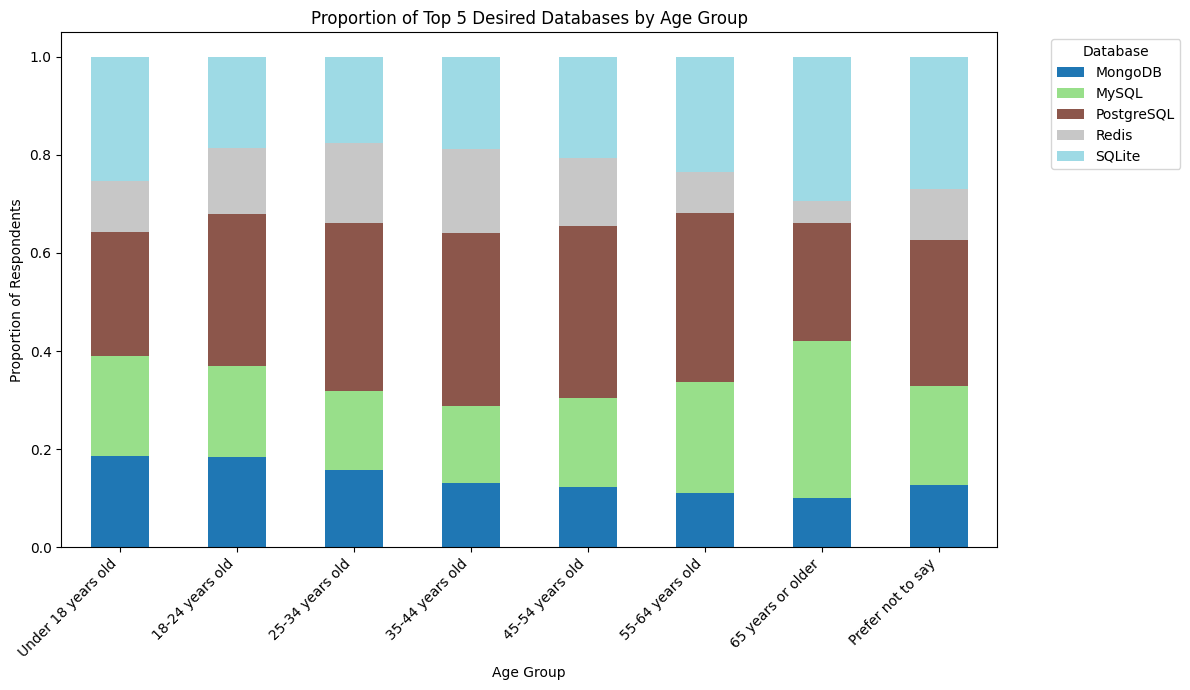

In [12]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('survey-data.csv')

# Clean and keep relevant columns
df_subset = df[['Age', 'DatabaseWantToWorkWith']].dropna()

# Split multi-valued entries (assuming ';' separated)
df_expanded = df_subset.assign(
    DatabaseWantToWorkWith=df_subset['DatabaseWantToWorkWith'].str.split(';')
).explode('DatabaseWantToWorkWith')

# Strip whitespace from database names
df_expanded['DatabaseWantToWorkWith'] = df_expanded['DatabaseWantToWorkWith'].str.strip()

# Get top 5 databases overall
top_dbs = df_expanded['DatabaseWantToWorkWith'].value_counts().nlargest(5).index.tolist()

# Filter to top databases only
df_top = df_expanded[df_expanded['DatabaseWantToWorkWith'].isin(top_dbs)]

# Group by Age and DatabaseWantToWorkWith, count responses
grouped = df_top.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Sort age groups logically (customize as needed)
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]
grouped = grouped.reindex(age_order).fillna(0)

# Normalize to proportions within each age group
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Plot stacked bar chart
proportions.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Proportion of Top 5 Desired Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_2056/3547719846.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


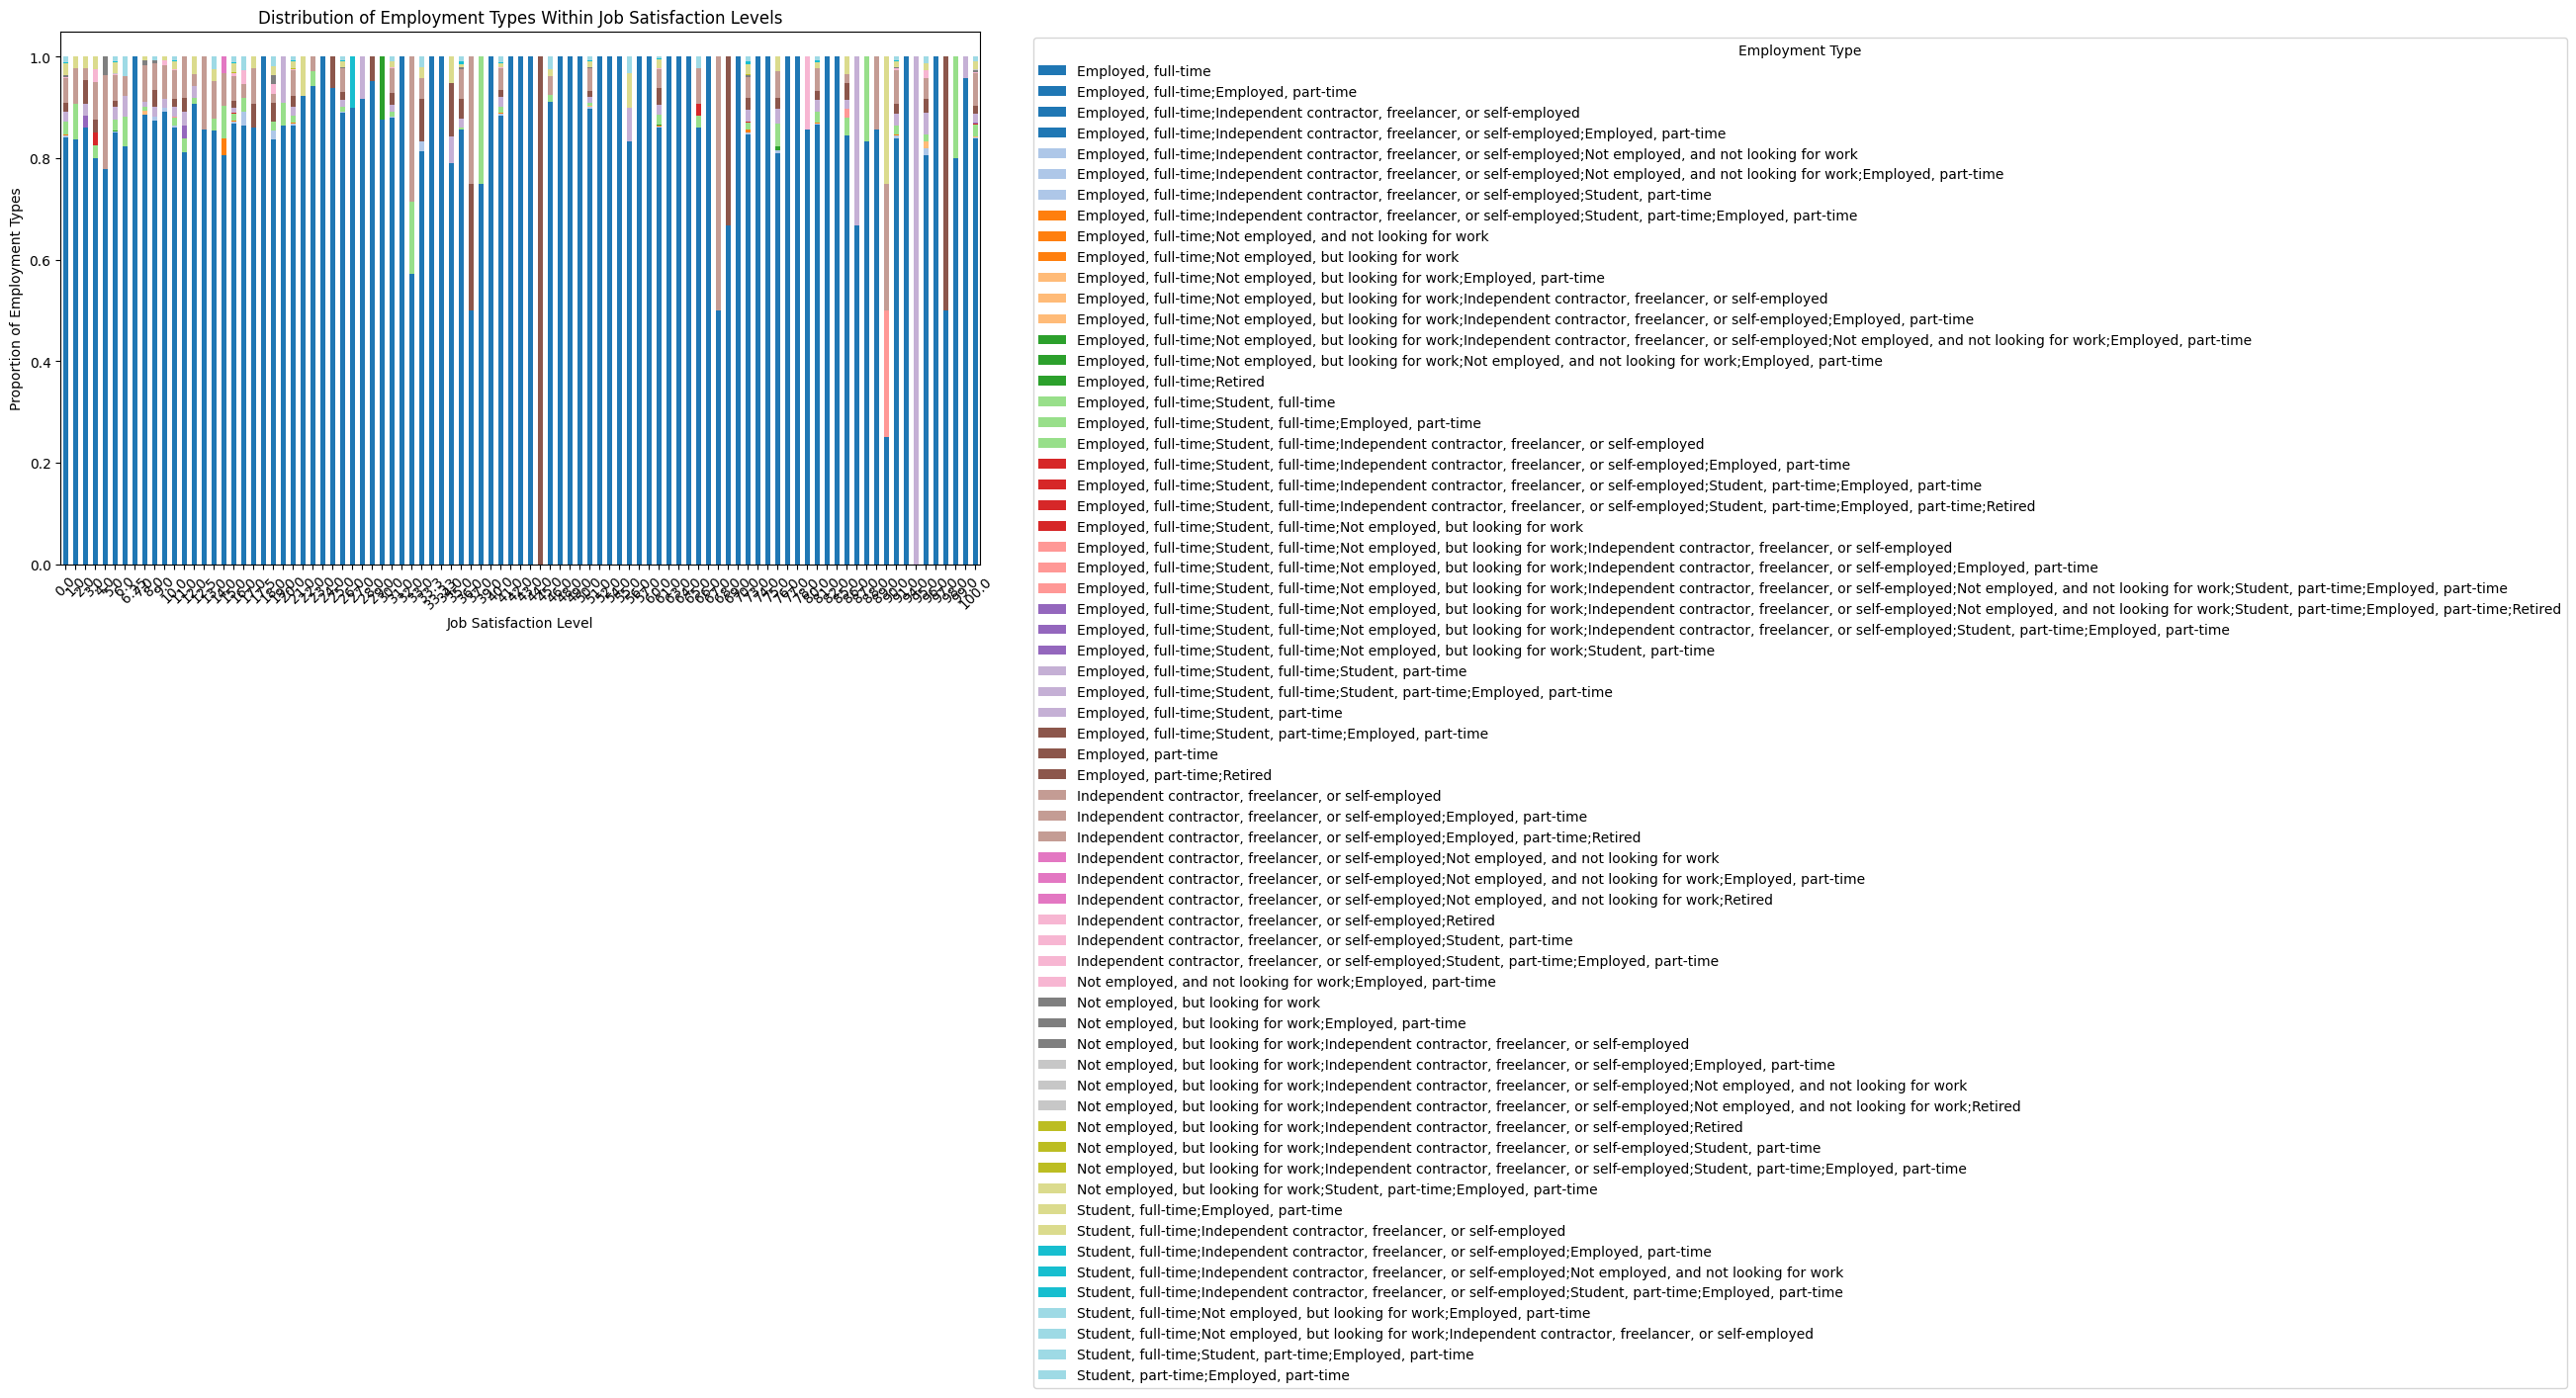

In [13]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('survey-data.csv')

# Drop rows with missing values in Employment or JobSatPoints_6
df_clean = df[['Employment', 'JobSatPoints_6']].dropna()

# Group by job satisfaction and employment type, count respondents
grouped = df_clean.groupby(['JobSatPoints_6', 'Employment']).size().unstack(fill_value=0)

# Sort job satisfaction levels if numeric or categorical
grouped = grouped.sort_index()

# Normalize within each job satisfaction level to get proportions
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Plot stacked bar chart
proportions.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')

plt.title('Distribution of Employment Types Within Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Proportion of Employment Types')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


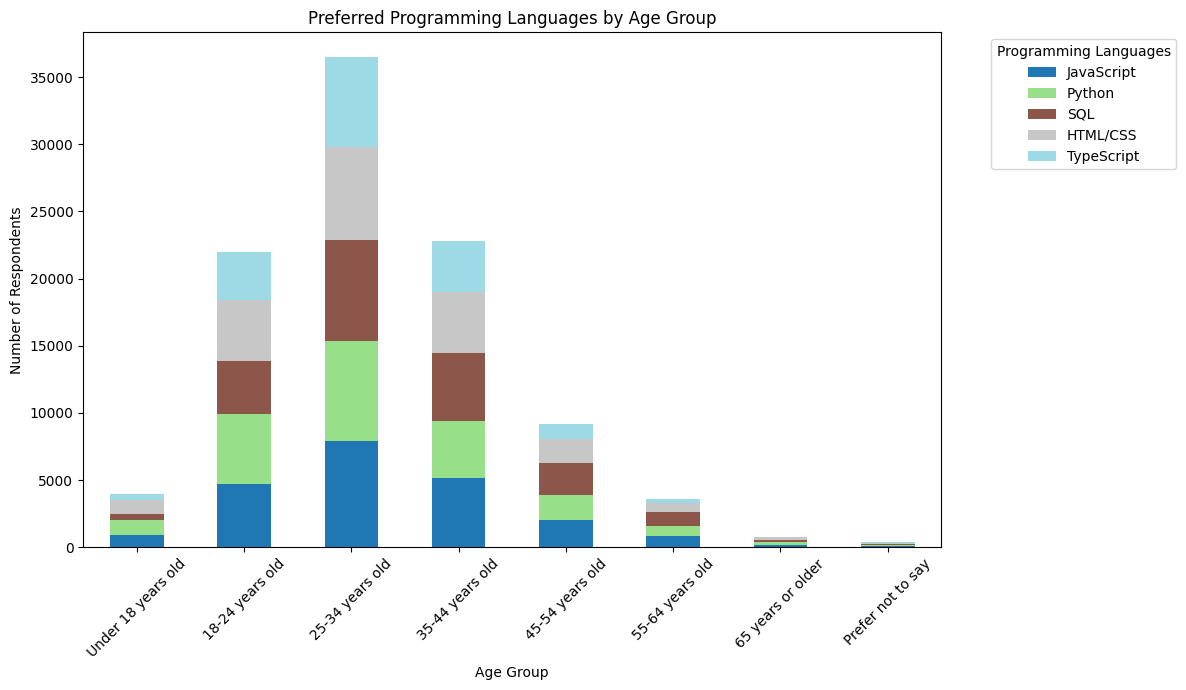

In [14]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('survey-data.csv')

# Drop rows with missing Age or LanguageAdmired
df_clean = df[['Age', 'LanguageAdmired']].dropna()

# Explode the LanguageAdmired column (split by semicolon and create one row per language)
df_clean = df_clean.assign(LanguageAdmired=df_clean['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')

# Strip whitespace from language names
df_clean['LanguageAdmired'] = df_clean['LanguageAdmired'].str.strip()

# Group by Age and LanguageAdmired and count occurrences
grouped = df_clean.groupby(['Age', 'LanguageAdmired']).size().reset_index(name='count')

# Pivot so Age groups are index, languages are columns, and values are counts
pivot_table = grouped.pivot(index='Age', columns='LanguageAdmired', values='count').fillna(0)

# Optional: Select top 5 languages overall for cleaner visualization
top_languages = pivot_table.sum().sort_values(ascending=False).head(5).index
pivot_table_top = pivot_table[top_languages]

# Sort Age groups in a logical order if possible (customize as needed)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older', 'Prefer not to say'
]
pivot_table_top = pivot_table_top.reindex(age_order).fillna(0)

# Plot stacked bar chart
pivot_table_top.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')

plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Programming Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


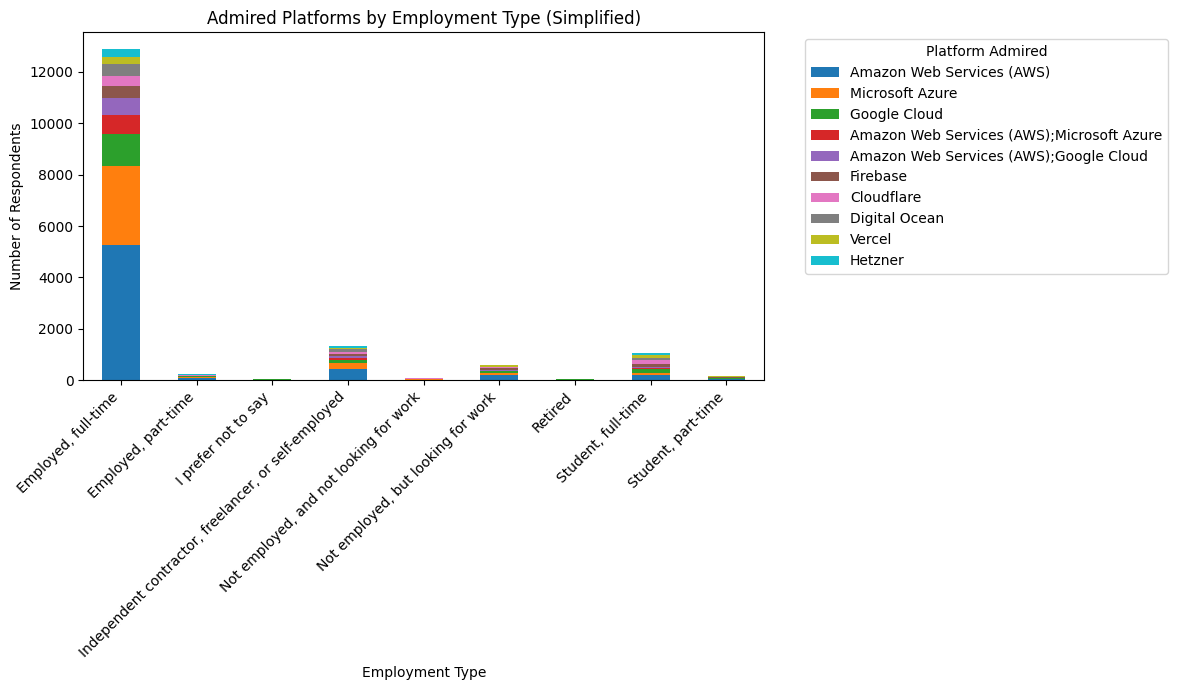

In [19]:
##Write your code here
# Extract substring before first semicolon to simplify Employment categories
df['Employment_simple'] = df['Employment'].str.split(';').str[0]

# Group by simplified Employment and PlatformAdmired, aggregating counts
grouped = df.groupby(['Employment_simple', 'PlatformAdmired']).size().unstack(fill_value=0)

# Optional: keep only top platforms to reduce complexity
top_platforms = grouped.sum().sort_values(ascending=False).head(10).index
grouped = grouped[top_platforms]

# Plot stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(12,7))
ax.set_ylabel('Number of Respondents')
ax.set_xlabel('Employment Type')
ax.set_title('Admired Platforms by Employment Type (Simplified)')
ax.legend(title='Platform Admired', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
